In [1]:
import sys
sys.path.append('../src') 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from GA import solve_nsga2, calculate_route_distance

In [2]:
distance_df = pd.read_csv(r'C:\Users\ASUS\mTSP\data\HN_distance_matrix.csv', index_col=0)
distance_matrix = distance_df.values

# Kiểm tra sơ bộ
print("Số thành phố:", distance_matrix.shape[0])
print("Ví dụ khoảng cách [0][1]:", distance_matrix[0][1])


Số thành phố: 127
Ví dụ khoảng cách [0][1]: 21.48


In [3]:
def detect_convergence(generation_fitness, tolerance=1e-3, window=5):
    for i in range(len(generation_fitness) - window):
        window_values = generation_fitness[i:i+window]
        if max(window_values) - min(window_values) < tolerance:
            return i + window
    return len(generation_fitness)


=== Số người (m) = 1 ===
[m=1] Dừng sớm tại thế hệ 70
Tổng quãng đường: 1559.98
Tuyến dài nhất: 1559.98
Chênh lệch tuyến (Balance): 0.00
Thời gian thực thi: 0.7363 giây
Số vòng lặp để hội tụ: 71
Tốc độ hội tụ: 96.4342 đơn vị/gen
 - Tuyến 1 (1559.98): [0, 44, 43, 100, 119, 59, 86, 15, 47, 33, 92, 98, 97, 93, 48, 95, 82, 1, 35, 83, 91, 122, 108, 78, 121, 104, 24, 72, 27, 30, 50, 58, 79, 73, 75, 103, 110, 74, 54, 62, 101, 125, 126, 40, 85, 124, 123, 111, 13, 23, 34, 14, 116, 7, 120, 99, 25, 37, 38, 69, 4, 16, 80, 31, 29, 18, 118, 115, 109, 22, 112, 106, 6, 17, 5, 12, 117, 70, 8, 41, 10, 90, 66, 114, 94, 84, 39, 63, 26, 36, 42, 28, 57, 87, 11, 3, 60, 49, 65, 68, 96, 56, 20, 81, 53, 51, 107, 32, 21, 67, 102, 71, 113, 52, 89, 45, 105, 55, 88, 2, 77, 76, 64, 9, 46, 61, 19, 0]


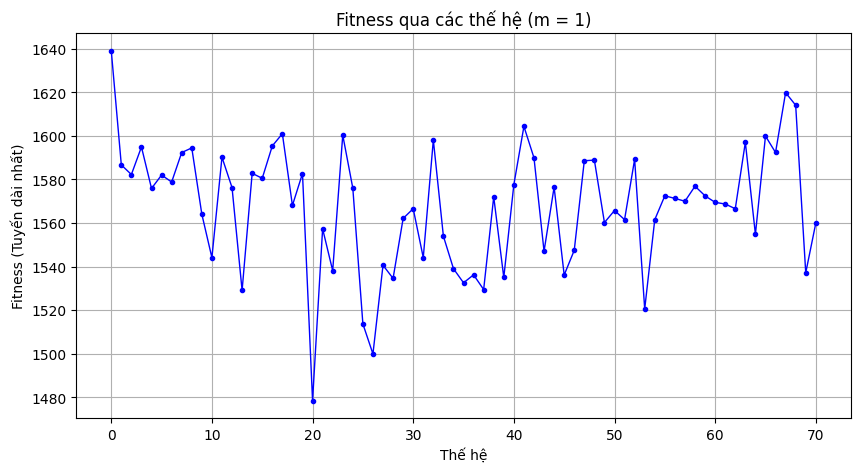


=== Số người (m) = 2 ===
[m=2] Dừng sớm tại thế hệ 76
Tổng quãng đường: 1596.42
Tuyến dài nhất: 803.90
Chênh lệch tuyến (Balance): 5.69
Thời gian thực thi: 0.8301 giây
Số vòng lặp để hội tụ: 77
Tốc độ hội tụ: 92.7548 đơn vị/gen
 - Tuyến 1 (803.90): [0, 78, 72, 98, 105, 17, 108, 21, 13, 14, 102, 70, 82, 32, 118, 39, 100, 99, 23, 52, 40, 124, 56, 43, 96, 60, 81, 18, 55, 68, 49, 51, 10, 3, 101, 73, 121, 63, 106, 37, 54, 97, 9, 119, 64, 4, 53, 57, 11, 1, 115, 47, 67, 29, 25, 71, 122, 125, 65, 26, 8, 87, 58, 62, 0]
 - Tuyến 2 (792.52): [0, 59, 95, 117, 75, 114, 83, 44, 112, 41, 22, 46, 36, 110, 113, 38, 84, 123, 126, 104, 48, 20, 30, 27, 103, 45, 24, 107, 109, 74, 42, 88, 91, 28, 120, 86, 111, 34, 19, 16, 80, 31, 6, 35, 92, 90, 61, 76, 69, 116, 2, 12, 15, 89, 77, 5, 66, 7, 93, 85, 79, 50, 33, 94, 0]


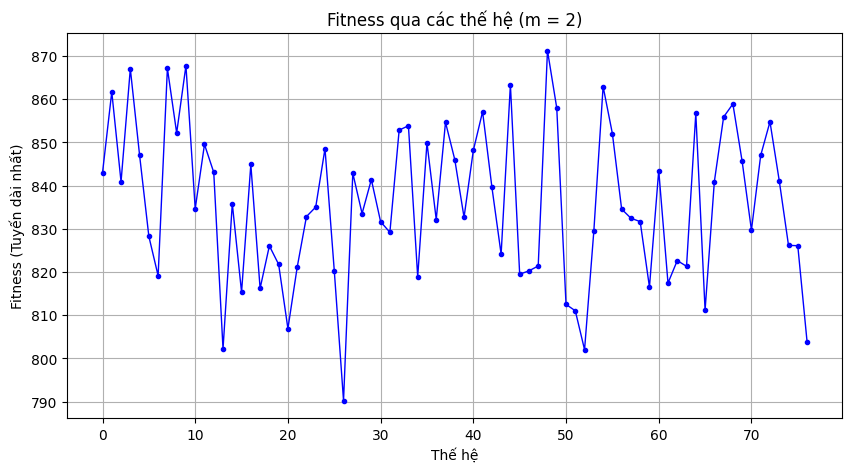


=== Số người (m) = 3 ===
[m=3] Dừng sớm tại thế hệ 63
Tổng quãng đường: 1741.68
Tuyến dài nhất: 588.94
Chênh lệch tuyến (Balance): 10.37
Thời gian thực thi: 0.7299 giây
Số vòng lặp để hội tụ: 64
Tốc độ hội tụ: 87.6839 đơn vị/gen
 - Tuyến 1 (565.95): [0, 49, 30, 117, 79, 102, 115, 97, 119, 57, 74, 22, 92, 90, 28, 5, 69, 98, 53, 10, 19, 15, 33, 123, 78, 110, 60, 56, 89, 9, 39, 73, 17, 7, 106, 48, 91, 72, 32, 18, 66, 62, 126, 0]
 - Tuyến 2 (588.94): [0, 52, 94, 23, 41, 29, 103, 40, 71, 34, 31, 25, 101, 86, 59, 100, 20, 84, 12, 113, 42, 4, 107, 109, 82, 85, 118, 112, 93, 16, 77, 44, 14, 43, 50, 111, 65, 51, 63, 27, 81, 47, 105, 0]
 - Tuyến 3 (586.79): [0, 80, 46, 3, 37, 35, 121, 38, 95, 87, 24, 104, 76, 61, 70, 45, 2, 67, 122, 75, 55, 36, 124, 11, 83, 54, 114, 116, 88, 21, 99, 68, 58, 8, 6, 26, 125, 1, 13, 96, 64, 108, 120, 0]


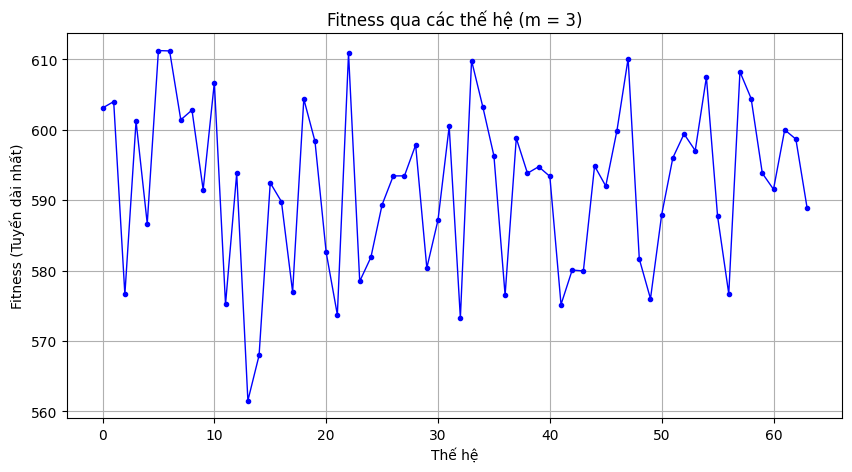


=== Số người (m) = 4 ===
[m=4] Dừng sớm tại thế hệ 74
Tổng quãng đường: 1739.78
Tuyến dài nhất: 445.73
Chênh lệch tuyến (Balance): 9.86
Thời gian thực thi: 0.8389 giây
Số vòng lặp để hội tụ: 75
Tốc độ hội tụ: 89.3984 đơn vị/gen
 - Tuyến 1 (418.90): [0, 72, 10, 35, 73, 119, 107, 112, 14, 36, 37, 99, 120, 93, 86, 12, 97, 90, 59, 48, 27, 7, 77, 71, 54, 28, 20, 53, 16, 110, 114, 105, 0]
 - Tuyến 2 (445.73): [0, 69, 8, 108, 42, 81, 92, 122, 33, 4, 1, 88, 125, 96, 39, 89, 65, 104, 58, 56, 103, 43, 47, 5, 19, 113, 111, 124, 84, 98, 87, 79, 0]
 - Tuyến 3 (438.37): [0, 62, 64, 91, 17, 101, 76, 29, 2, 83, 31, 57, 22, 3, 15, 46, 50, 51, 45, 34, 100, 118, 66, 70, 60, 80, 41, 21, 116, 78, 109, 126, 0]
 - Tuyến 4 (436.78): [0, 67, 38, 52, 61, 18, 30, 95, 55, 94, 68, 9, 11, 74, 117, 49, 75, 32, 44, 63, 25, 115, 106, 13, 123, 40, 24, 26, 82, 85, 121, 23, 102, 6, 0]


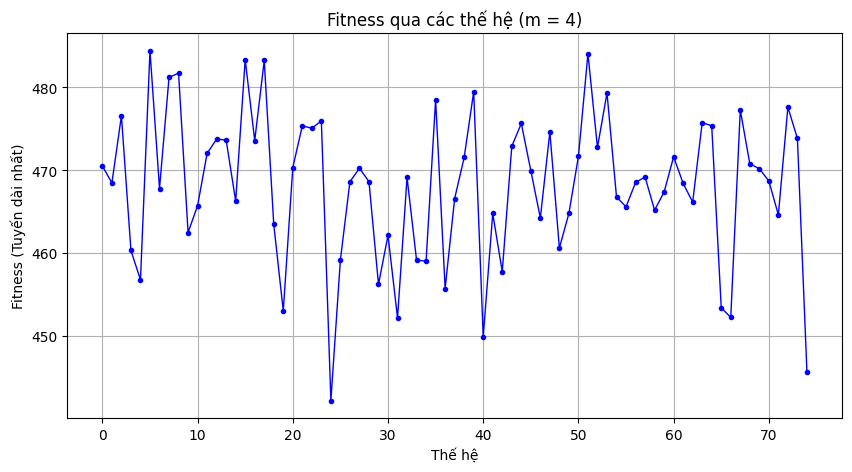


=== Số người (m) = 5 ===
[m=5] Dừng sớm tại thế hệ 73
Tổng quãng đường: 1876.39
Tuyến dài nhất: 399.62
Chênh lệch tuyến (Balance): 26.61
Thời gian thực thi: 0.8540 giây
Số vòng lặp để hội tụ: 74
Tốc độ hội tụ: 86.6496 đơn vị/gen
 - Tuyến 1 (393.36): [0, 126, 97, 99, 83, 21, 54, 84, 86, 15, 89, 27, 101, 87, 22, 9, 57, 52, 50, 77, 96, 44, 33, 105, 109, 76, 0]
 - Tuyến 2 (393.89): [0, 34, 41, 8, 92, 94, 85, 68, 19, 13, 32, 59, 122, 115, 93, 65, 112, 63, 117, 118, 42, 17, 91, 116, 69, 120, 0]
 - Tuyến 3 (330.39): [0, 10, 108, 71, 62, 74, 28, 40, 39, 107, 53, 1, 2, 102, 29, 61, 79, 11, 43, 100, 51, 4, 18, 88, 12, 14, 0]
 - Tuyến 4 (399.62): [0, 111, 114, 98, 49, 73, 45, 119, 123, 121, 95, 36, 81, 110, 47, 48, 60, 64, 30, 104, 90, 124, 38, 66, 31, 25, 0]
 - Tuyến 5 (359.13): [0, 78, 20, 37, 72, 106, 67, 125, 26, 35, 7, 82, 58, 46, 113, 56, 23, 6, 16, 75, 103, 24, 55, 80, 5, 3, 70, 0]


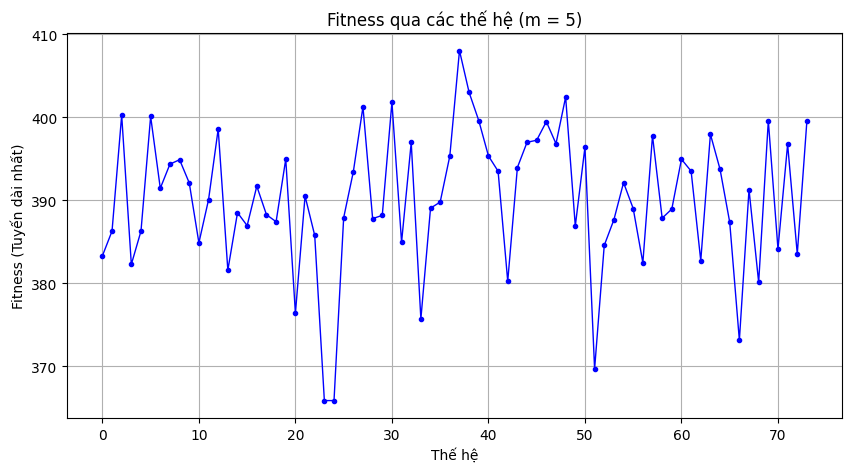

In [4]:
for m in range(1, 6):
    print(f"\n=== Số người (m) = {m} ===")
    total_fitness, balance, routes, fitness_gen, exec_time, gen_ran = solve_nsga2(distance_matrix, m)
    total_distance = sum(calculate_route_distance([0] + r + [0], distance_matrix) for r in routes)
    converged_at = detect_convergence(fitness_gen)
    convergence_speed = converged_at / exec_time if exec_time > 0 else 0

    print(f"Tổng quãng đường: {total_distance:.2f}")
    print(f"Tuyến dài nhất: {total_fitness:.2f}")
    print(f"Chênh lệch tuyến (Balance): {balance:.2f}")
    print(f"Thời gian thực thi: {exec_time:.4f} giây")
    print(f"Số vòng lặp để hội tụ: {converged_at}")
    print(f"Tốc độ hội tụ: {convergence_speed:.4f} đơn vị/gen")
    for i, r in enumerate(routes):
        route_distance = calculate_route_distance([0] + r + [0], distance_matrix)
        print(f" - Tuyến {i+1} ({route_distance:.2f}): {[0] + r + [0]}")

    # Trực quan hóa cho mỗi m
    plt.figure(figsize=(10, 5))
    plt.plot(fitness_gen, 'bo-', linewidth=1, markersize=3)
    plt.title(f'Fitness qua các thế hệ (m = {m})')
    plt.xlabel('Thế hệ')
    plt.ylabel('Fitness (Tuyến dài nhất)')
    plt.grid(True)
    plt.show()
